In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fileURL = '/content/drive/MyDrive/skripsi/dataset.csv'
dfdesa = pd.read_csv(fileURL)

# Data Understanding

In [3]:
dfdesa.describe()

No.  JML Penduduk  JML Penduduk Belum/Tidak Bekerja  \
count  281.000000    281.000000                        281.000000   
mean   141.000000   3646.195730                       1229.348754   
std     81.261922   2533.047343                        889.790328   
min      1.000000    203.000000                         71.000000   
25%     71.000000   1903.000000                        648.000000   
50%    141.000000   3128.000000                       1071.000000   
75%    211.000000   4493.000000                       1512.000000   
max    281.000000  17822.000000                       6787.000000   

       TIDAK SEKOLAH  BELUM TAMAT SD           SD         SLTP         SLTA  \
count     281.000000      281.000000   281.000000   281.000000   281.000000   
mean     1300.046263      324.313167  1332.334520   287.779359   292.957295   
std       881.162245      250.873435   830.600687   257.109984   498.819132   
min        68.000000       11.000000    73.000000    20.000000    16.000000   
25%       685.000000      161.000000   761.000000   140.000000    80.000000   
50%      1092.000000      264.000000  1149.000000   210.000000   132.000000   
75%      1663.000000      415.000000  1713.000000   345.000000   267.000000   
max      5996.000000     2065.000000  4678.000000  1971.000000  3690.000000   

           DI/DII        DIII       DIV/S1          S2          S3  \
count  281.000000  281.000000   281.000000  281.000000  281.000000   
mean     4.177936   12.039146    86.629893    5.402135    0.516014   
std      9.171988   33.710033   228.493744   19.143775    1.230821   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    1.000000    11.000000    0.000000    0.000000   
50%      1.000000    3.000000    23.000000    1.000000    0.000000   
75%      3.000000    8.000000    54.000000    3.000000    1.000000   
max     66.000000  310.000000  1981.000000  222.000000   10.000000   

       SD/SEDERAJAT  SMP/SEDERAJAT  SMA/SEDERAJAT  SMK/SEDERAJAT  \
count    281.000000     281.000000     281.000000     281.000000   
mean       2.946619       1.462633       0.512456       0.245552   
std        1.901315       1.509325       0.858167       0.579584   
min        0.000000       0.000000       0.000000       0.000000   
25%        2.000000       0.000000       0.000000       0.000000   
50%        3.000000       1.000000       0.000000       0.000000   
75%        4.000000       2.000000       1.000000       0.000000   
max       14.000000      12.000000       4.000000       4.000000   

       PERGURUAN TINGGI   PESANTREN  
count        281.000000  281.000000  
mean           0.046263    0.128114  
std            0.318471    0.483248  
min            0.000000    0.000000  
25%            0.000000    0.000000  
50%            0.000000    0.000000  
75%            0.000000    0.000000  
max            4.000000    5.000000

In [4]:
dfdesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   No.                               281 non-null    int64 
 1   Kab/Kota                          281 non-null    object
 2   Kecamatan                         281 non-null    object
 3   Desa                              281 non-null    object
 4   JML Penduduk                      281 non-null    int64 
 5   JML Penduduk Belum/Tidak Bekerja  281 non-null    int64 
 6   TIDAK SEKOLAH                     281 non-null    int64 
 7   BELUM TAMAT SD                    281 non-null    int64 
 8   SD                                281 non-null    int64 
 9   SLTP                              281 non-null    int64 
 10  SLTA                              281 non-null    int64 
 11  DI/DII                            281 non-null    int64 
 12  DIII                  

# Data Preparation

Cleaning Data

In [5]:
kolom_dihapus = ['No.', 'JML Penduduk', 'JML Penduduk Belum/Tidak Bekerja', 'Kab/Kota', 'Kecamatan']

df_cleaned = dfdesa.drop(columns=kolom_dihapus)

print("\nKolom setelah dihapus:")
print(df_cleaned.columns)


Kolom setelah dihapus:
Index(['Desa', 'TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
       'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT', 'SMP/SEDERAJAT',
       'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN'],
      dtype='object')


In [6]:
df_cleaned.corr(numeric_only=True)

TIDAK SEKOLAH  BELUM TAMAT SD        SD      SLTP      SLTA  \
TIDAK SEKOLAH          1.000000        0.839712  0.850015  0.771086  0.640240   
BELUM TAMAT SD         0.839712        1.000000  0.757367  0.531179  0.376184   
SD                     0.850015        0.757367  1.000000  0.531756  0.293145   
SLTP                   0.771086        0.531179  0.531756  1.000000  0.910869   
SLTA                   0.640240        0.376184  0.293145  0.910869  1.000000   
DI/DII                 0.527406        0.287344  0.186497  0.749590  0.861401   
DIII                   0.517814        0.277484  0.147036  0.733562  0.908145   
DIV/S1                 0.554536        0.301082  0.167923  0.758154  0.927453   
S2                     0.474439        0.252068  0.105548  0.621119  0.813717   
S3                     0.418600        0.302545  0.123579  0.473626  0.606424   
SD/SEDERAJAT           0.783555        0.729798  0.767628  0.484220  0.346072   
SMP/SEDERAJAT          0.602166        0.521140  0.526078  0.345357  0.270848   
SMA/SEDERAJAT          0.364789        0.263744  0.241654  0.344152  0.319041   
SMK/SEDERAJAT          0.381472        0.258480  0.235680  0.276508  0.275391   
PERGURUAN TINGGI       0.163365        0.056544 -0.053146  0.161813  0.315543   
PESANTREN              0.191767        0.166317  0.124346  0.175023  0.218691   

                    DI/DII      DIII    DIV/S1        S2        S3  \
TIDAK SEKOLAH     0.527406  0.517814  0.554536  0.474439  0.418600   
BELUM TAMAT SD    0.287344  0.277484  0.301082  0.252068  0.302545   
SD                0.186497  0.147036  0.167923  0.105548  0.123579   
SLTP              0.749590  0.733562  0.758154  0.621119  0.473626   
SLTA              0.861401  0.908145  0.927453  0.813717  0.606424   
DI/DII            1.000000  0.867145  0.889229  0.795576  0.559706   
DIII              0.867145  1.000000  0.979933  0.939960  0.724797   
DIV/S1            0.889229  0.979933  1.000000  0.952685  0.714332   
S2                0.795576  0.939960  0.952685  1.000000  0.764028   
S3                0.559706  0.724797  0.714332  0.764028  1.000000   
SD/SEDERAJAT      0.298117  0.277530  0.298147  0.258159  0.320092   
SMP/SEDERAJAT     0.297939  0.257465  0.297990  0.291176  0.261301   
SMA/SEDERAJAT     0.386303  0.296955  0.342020  0.349368  0.188314   
SMK/SEDERAJAT     0.360588  0.315926  0.344721  0.391169  0.277333   
PERGURUAN TINGGI  0.454450  0.503826  0.518808  0.664157  0.503777   
PESANTREN         0.229316  0.193935  0.240749  0.215618  0.128637   

                  SD/SEDERAJAT  SMP/SEDERAJAT  SMA/SEDERAJAT  SMK/SEDERAJAT  \
TIDAK SEKOLAH         0.783555       0.602166       0.364789       0.381472   
BELUM TAMAT SD        0.729798       0.521140       0.263744       0.258480   
SD                    0.767628       0.526078       0.241654       0.235680   
SLTP                  0.484220       0.345357       0.344152       0.276508   
SLTA                  0.346072       0.270848       0.319041       0.275391   
DI/DII                0.298117       0.297939       0.386303       0.360588   
DIII                  0.277530       0.257465       0.296955       0.315926   
DIV/S1                0.298147       0.297990       0.342020       0.344721   
S2                    0.258159       0.291176       0.349368       0.391169   
S3                    0.320092       0.261301       0.188314       0.277333   
SD/SEDERAJAT          1.000000       0.645835       0.327642       0.310104   
SMP/SEDERAJAT         0.645835       1.000000       0.607660       0.514734   
SMA/SEDERAJAT         0.327642       0.607660       1.000000       0.349263   
SMK/SEDERAJAT         0.310104       0.514734       0.349263       1.000000   
PERGURUAN TINGGI      0.098464       0.230225       0.396450       0.421958   
PESANTREN             0.162951       0.256310       0.245884       0.040296   

                  PERGURUAN TINGGI  PESANTREN  
TIDAK SEKOLAH             0.163365   0.191767  
BELUM TAM

Missing Value

In [7]:
print(df_cleaned.isnull().sum())

Desa                0
TIDAK SEKOLAH       0
BELUM TAMAT SD      0
SD                  0
SLTP                0
SLTA                0
DI/DII              0
DIII                0
DIV/S1              0
S2                  0
S3                  0
SD/SEDERAJAT        0
SMP/SEDERAJAT       0
SMA/SEDERAJAT       0
SMK/SEDERAJAT       0
PERGURUAN TINGGI    0
PESANTREN           0
dtype: int64


Data Duplicate

In [8]:
data_duplikat = df_cleaned.duplicated()
print("\nData yang duplikat:")
print(df_cleaned[data_duplikat])


Data yang duplikat:
Empty DataFrame
Columns: [Desa, TIDAK SEKOLAH, BELUM TAMAT SD, SD, SLTP, SLTA, DI/DII, DIII, DIV/S1, S2, S3, SD/SEDERAJAT, SMP/SEDERAJAT, SMA/SEDERAJAT, SMK/SEDERAJAT, PERGURUAN TINGGI, PESANTREN]
Index: []


Outlier

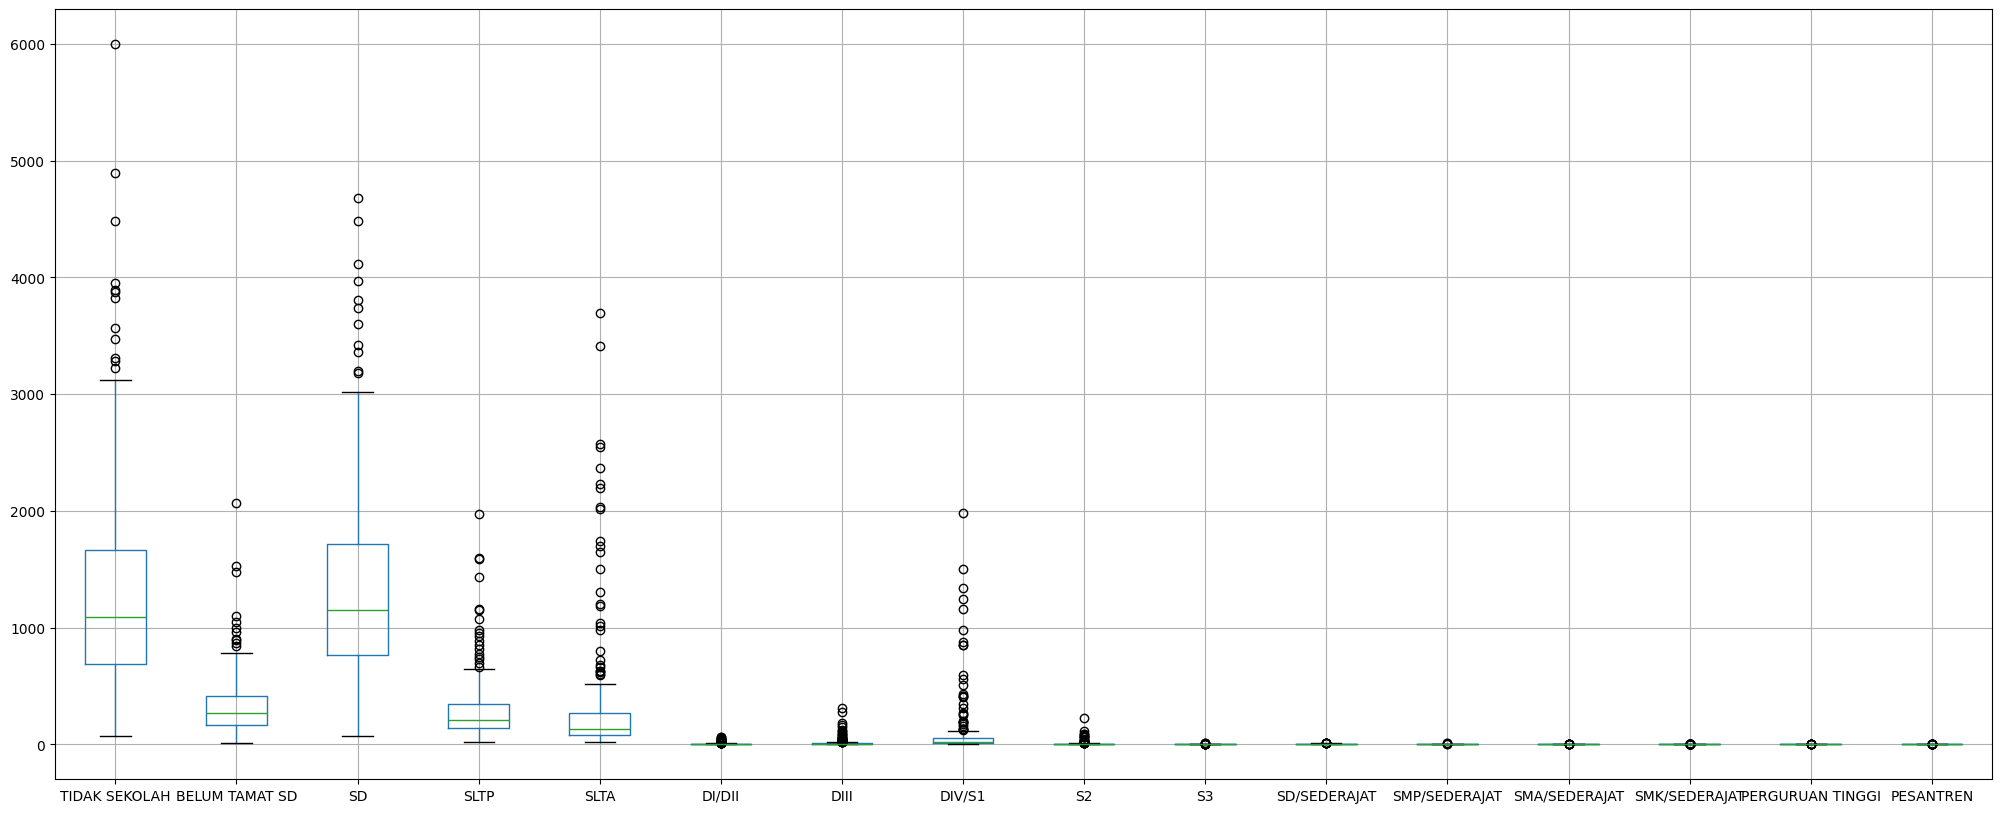

In [9]:
plt.figure(figsize=(25, 10))
dfdesa.boxplot(column=['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
       'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT', 'SMP/SEDERAJAT',
       'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN'])
plt.show()

In [10]:
def cap_outliers_all_columns(df_cleaned):
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:  # Hanya kolom numerik
        Q1 = df_cleaned[col].quantile(0.25)  # Kuartil pertama
        Q3 = df_cleaned[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Interquartile range
        # Menentukan batas bawah dan batas atas berdasarkan aturan 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Melakukan capping pada nilai-nilai di luar batas bawah dan atas
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

    return df_cleaned

# Mendeteksi dan melakukan capping outlier pada semua atribut numerik
dfdesacleaned = cap_outliers_all_columns(df_cleaned)

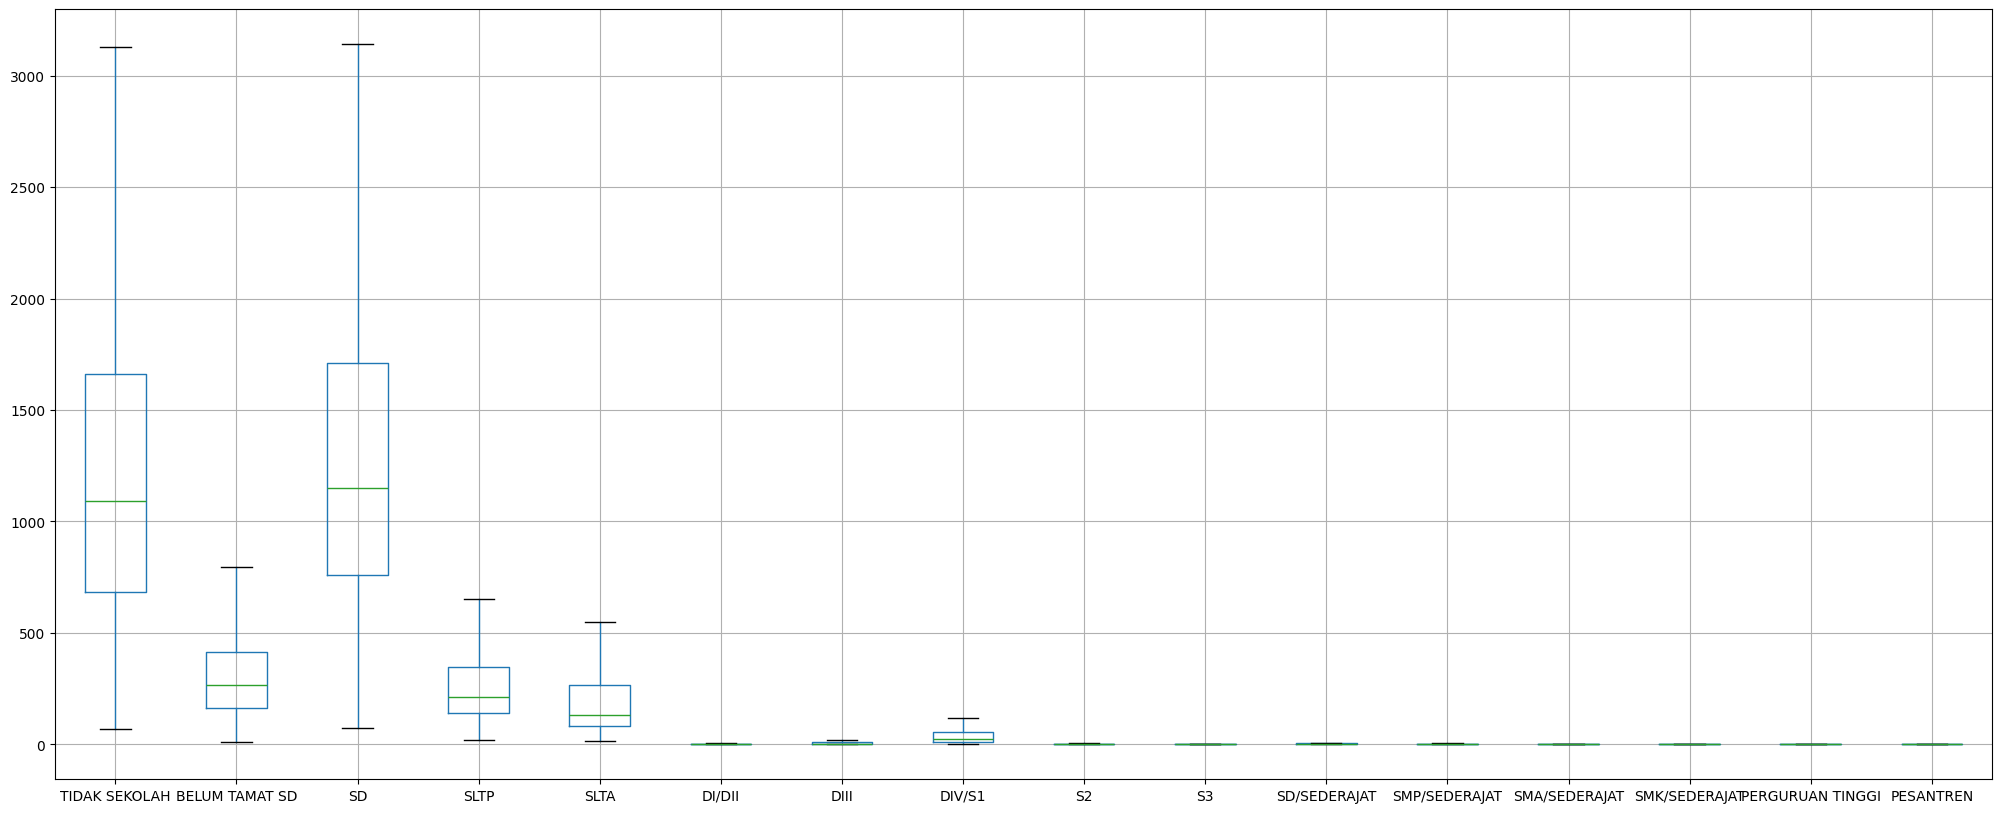

In [11]:
plt.figure(figsize=(25, 10))
dfdesacleaned.boxplot(column=['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
       'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT', 'SMP/SEDERAJAT',
       'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN'])
plt.show()

Normalisasi Data

In [12]:
x_train = dfdesacleaned[['TIDAK SEKOLAH', 'BELUM TAMAT SD',
                         'SD', 'SLTP', 'SLTA', 'DI/DII', 'DIII',
                         'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT',
                         'SMP/SEDERAJAT', 'SMA/SEDERAJAT',
                         'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN']].values

In [13]:
df_x_train_seb_normalisasi = pd.DataFrame(x_train, columns=['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
                                            'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT',
                                            'SMP/SEDERAJAT', 'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN'])

df_x_train_seb_normalisasi.head(5)

TIDAK SEKOLAH  BELUM TAMAT SD      SD   SLTP   SLTA  DI/DII  DIII  DIV/S1  \
0         3130.0           658.0  1070.0  652.5  547.5     7.5  18.5   118.5   
1         2409.0           398.0   898.0  629.0  547.5     7.5  18.5   118.5   
2         3130.0           578.0  1423.0  652.5  547.5     7.5  18.5   118.5   
3         2108.0           385.0   755.0  642.0  547.5     7.5  18.5   118.5   
4         2861.0           523.0  1496.0  652.5  547.5     7.5  18.5   118.5   

    S2   S3  SD/SEDERAJAT  SMP/SEDERAJAT  SMA/SEDERAJAT  SMK/SEDERAJAT  \
0  7.5  2.5           6.0            5.0            2.5            0.0   
1  7.5  2.5           4.0            3.0            0.0            0.0   
2  7.5  2.5           5.0            4.0            1.0            0.0   
3  7.5  2.5           4.0            4.0            2.5            0.0   
4  7.5  2.5           4.0            3.0            2.0            0.0   

   PERGURUAN TINGGI  PESANTREN  
0               0.0        0.0  
1               0.0        0.0  
2               0.0        0.0  
3               0.0        0.0  
4               0.0        0.0

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [15]:
df_x_train_set_normalisasi = pd.DataFrame(x_train, columns=['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
                                            'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT',
                                            'SMP/SEDERAJAT', 'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN'])

df_x_train_set_normalisasi.head(5)

TIDAK SEKOLAH  BELUM TAMAT SD        SD      SLTP  SLTA  DI/DII  DIII  \
0       1.000000        0.824204  0.324967  1.000000   1.0     1.0   1.0   
1       0.764533        0.492994  0.268905  0.962846   1.0     1.0   1.0   
2       1.000000        0.722293  0.440026  1.000000   1.0     1.0   1.0   
3       0.666231        0.476433  0.222295  0.983399   1.0     1.0   1.0   
4       0.912149        0.652229  0.463820  1.000000   1.0     1.0   1.0   

   DIV/S1   S2   S3  SD/SEDERAJAT  SMP/SEDERAJAT  SMA/SEDERAJAT  \
0     1.0  1.0  1.0      0.857143            1.0            1.0   
1     1.0  1.0  1.0      0.571429            0.6            0.0   
2     1.0  1.0  1.0      0.714286            0.8            0.4   
3     1.0  1.0  1.0      0.571429            0.8            1.0   
4     1.0  1.0  1.0      0.571429            0.6            0.8   

   SMK/SEDERAJAT  PERGURUAN TINGGI  PESANTREN  
0            0.0               0.0        0.0  
1            0.0               0.0        0.0  
2            0.0               0.0        0.0  
3            0.0               0.0        0.0  
4            0.0               0.0        0.0

# Modelling

K-Means

In [16]:
from sklearn.cluster import KMeans

In [17]:
model_km = KMeans(n_clusters=2, random_state=42)
cluster_km = model_km.fit_predict(x_train)
dfdesa_km = dfdesa.copy()
dfdesa_km['Cluster'] = cluster_km

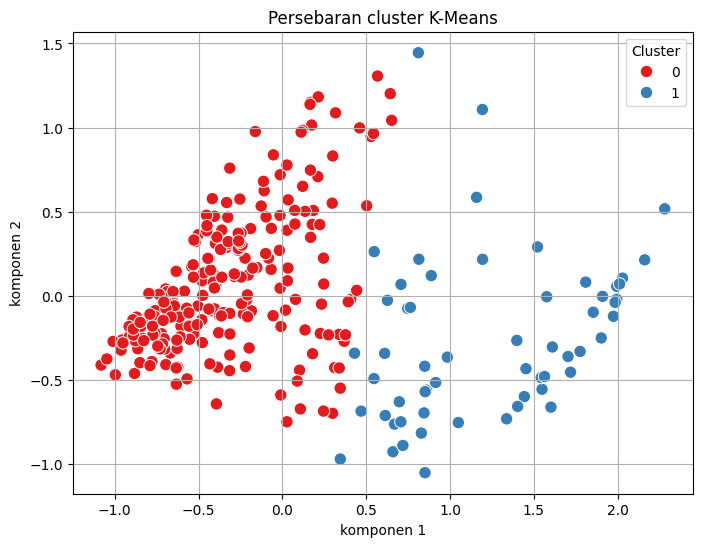

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns

# reduksi dimensi
pca_km = PCA(n_components=2)
X_pca_km = pca_km.fit_transform(x_train) # data numerik tanpa kolom cluster

# dataframe baru
pca_km_df = pd.DataFrame(data=X_pca_km, columns=['PC1', 'PC2'])
pca_km_df['Cluster'] = cluster_km


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=80)
plt.title('Persebaran cluster K-Means')
plt.xlabel('komponen 1')
plt.ylabel('komponen 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

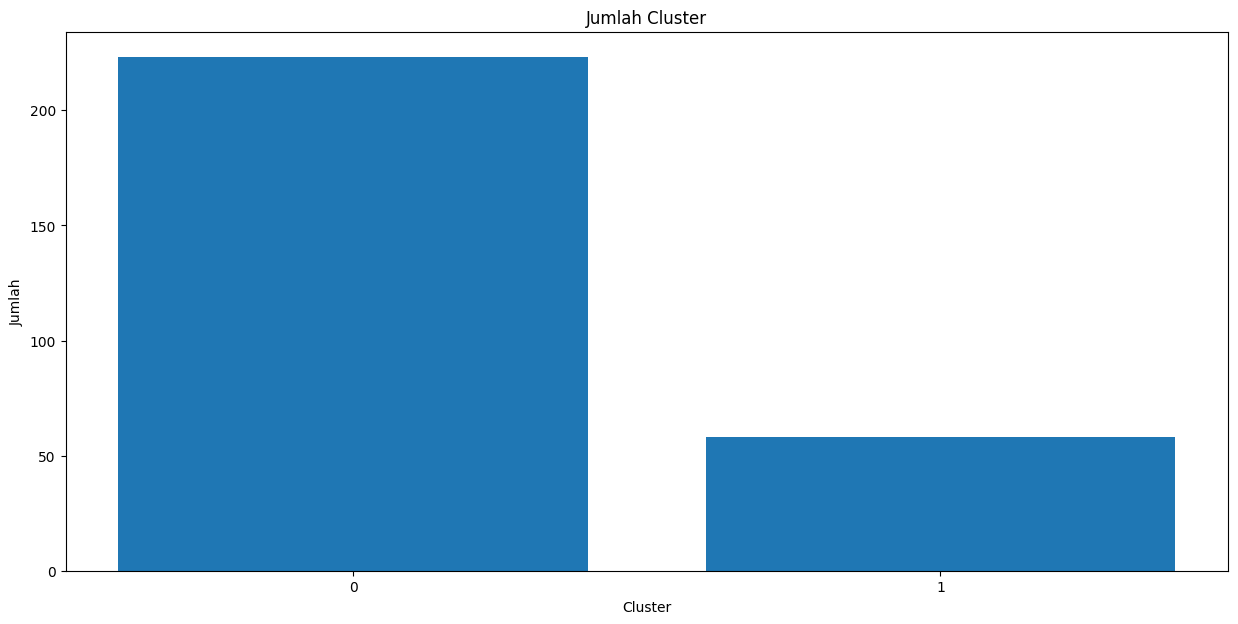


Cluster Assignments k-means:
Cluster
0    223
1     58
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(15, 7))
plt.bar(x=dfdesa_km['Cluster'].value_counts().index.astype(str), height=dfdesa_km['Cluster'].value_counts())
plt.title('Jumlah Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

print("\nCluster Assignments k-means:")
print(dfdesa_km['Cluster'].value_counts())

Ward Hierarchical

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [21]:
optimal_clusters = 2
model_hie = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
cluster_hie = model_hie.fit_predict(x_train)
dfdesa_hie = dfdesa.copy()
dfdesa_hie['Cluster'] = cluster_hie

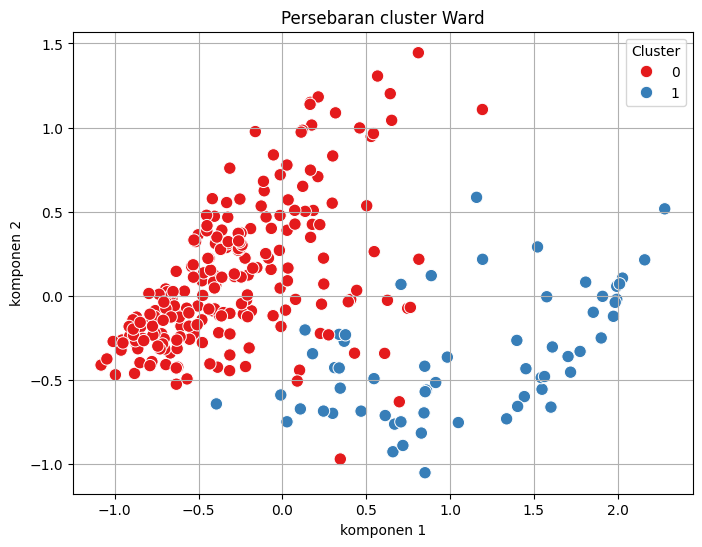

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

# reduksi dimensi
pca_hie = PCA(n_components=2)
X_pca_hie = pca_hie.fit_transform(x_train) # data numerik tanpa kolom cluster

# dataframe baru
pca_hie_df = pd.DataFrame(data=X_pca_hie, columns=['PC1', 'PC2'])
pca_hie_df['Cluster'] = cluster_hie


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_hie_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=80)
plt.title('Persebaran cluster Ward')
plt.xlabel('komponen 1')
plt.ylabel('komponen 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

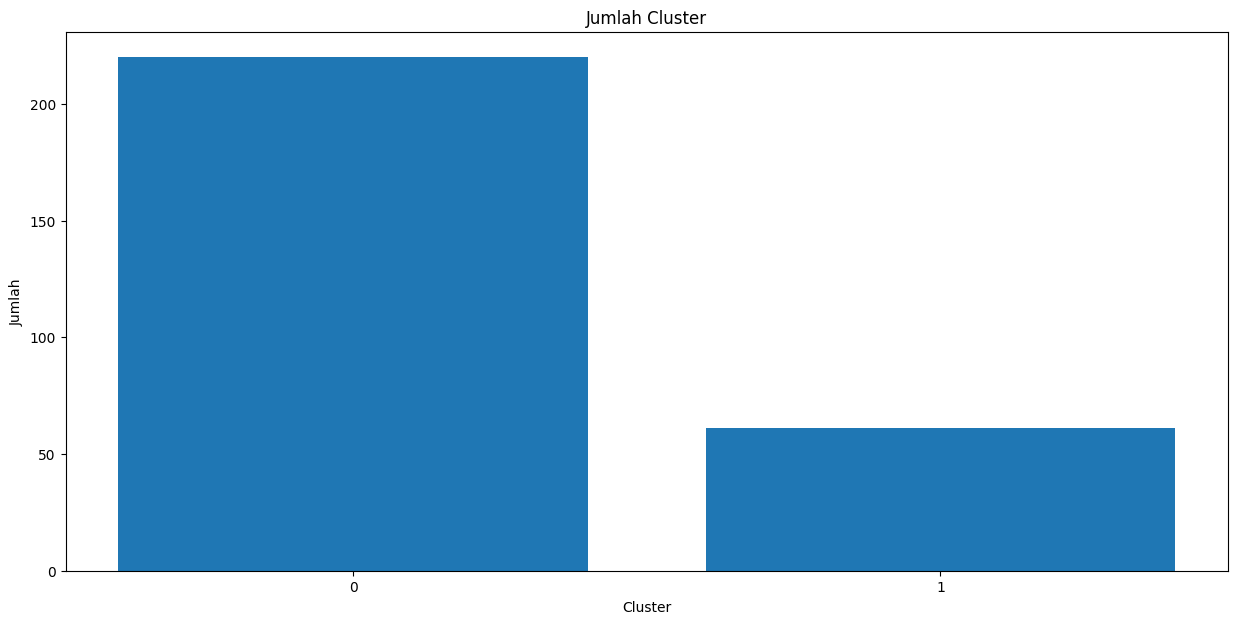


Cluster Assignments ward:
Cluster
0    220
1     61
Name: count, dtype: int64


In [23]:
plt.figure(figsize=(15, 7))
plt.bar(x=dfdesa_hie['Cluster'].value_counts().index.astype(str), height=dfdesa_hie['Cluster'].value_counts())
plt.title('Jumlah Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

print("\nCluster Assignments ward:")
print(dfdesa_hie['Cluster'].value_counts())

# Evaluasi

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

K-Means

In [25]:
inertias = []
k_range = range(1, 11)
for k in k_range:
  km = KMeans(n_clusters=k, random_state=42).fit(x_train)
  inertias.append(km.inertia_)

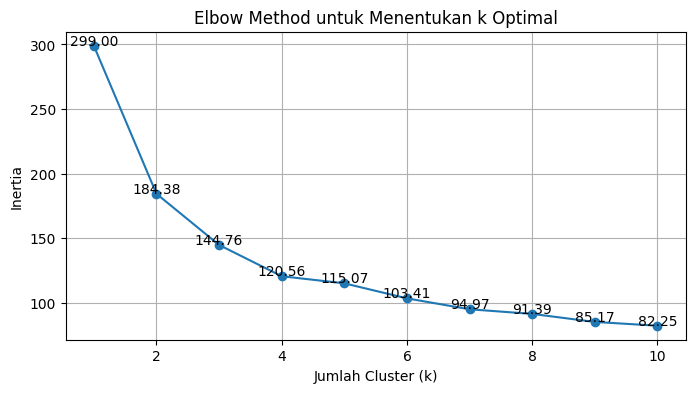

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')

for i, value in enumerate(inertias):
    plt.text(k_range[i], value + 0.5, f"{value:.2f}", ha='center')

plt.grid(True)
plt.show()

In [27]:
# Menghitung Silhouette Score
sil_score_km = silhouette_score(x_train, cluster_km)
print(f"Silhouette Score: {sil_score_km:.4f}")

# Menghitung Davies-Bouldin Index
dbi_score_km = davies_bouldin_score(x_train, cluster_km)
print(f"Davies-Bouldin Index: {dbi_score_km:.4f}")

# Menghitung Calinski-Harabasz Index
chi_score_km = calinski_harabasz_score(x_train, cluster_km)
print(f"Calinski-Harabaz Index: {chi_score_km:.4f}")

Silhouette Score: 0.4333
Davies-Bouldin Index: 1.0615
Calinski-Harabaz Index: 173.4482


Jumlah Cluster: 2, Silhouette Score: 0.4333, DBI: 1.0615, CHI:  173.4482
Jumlah Cluster: 3, Silhouette Score: 0.2791, DBI: 1.3363, CHI:  148.1013
Jumlah Cluster: 4, Silhouette Score: 0.2919, DBI: 1.3016, CHI:  136.6655
Jumlah Cluster: 5, Silhouette Score: 0.2803, DBI: 1.4904, CHI:  110.2948
Jumlah Cluster: 6, Silhouette Score: 0.2125, DBI: 1.5720, CHI:  104.0214
Jumlah Cluster: 7, Silhouette Score: 0.2268, DBI: 1.4991, CHI:  98.1028
Jumlah Cluster: 8, Silhouette Score: 0.1897, DBI: 1.6514, CHI:  88.5943
Jumlah Cluster: 9, Silhouette Score: 0.2320, DBI: 1.5308, CHI:  85.3578
Jumlah Cluster: 10, Silhouette Score: 0.2136, DBI: 1.4992, CHI:  79.3535


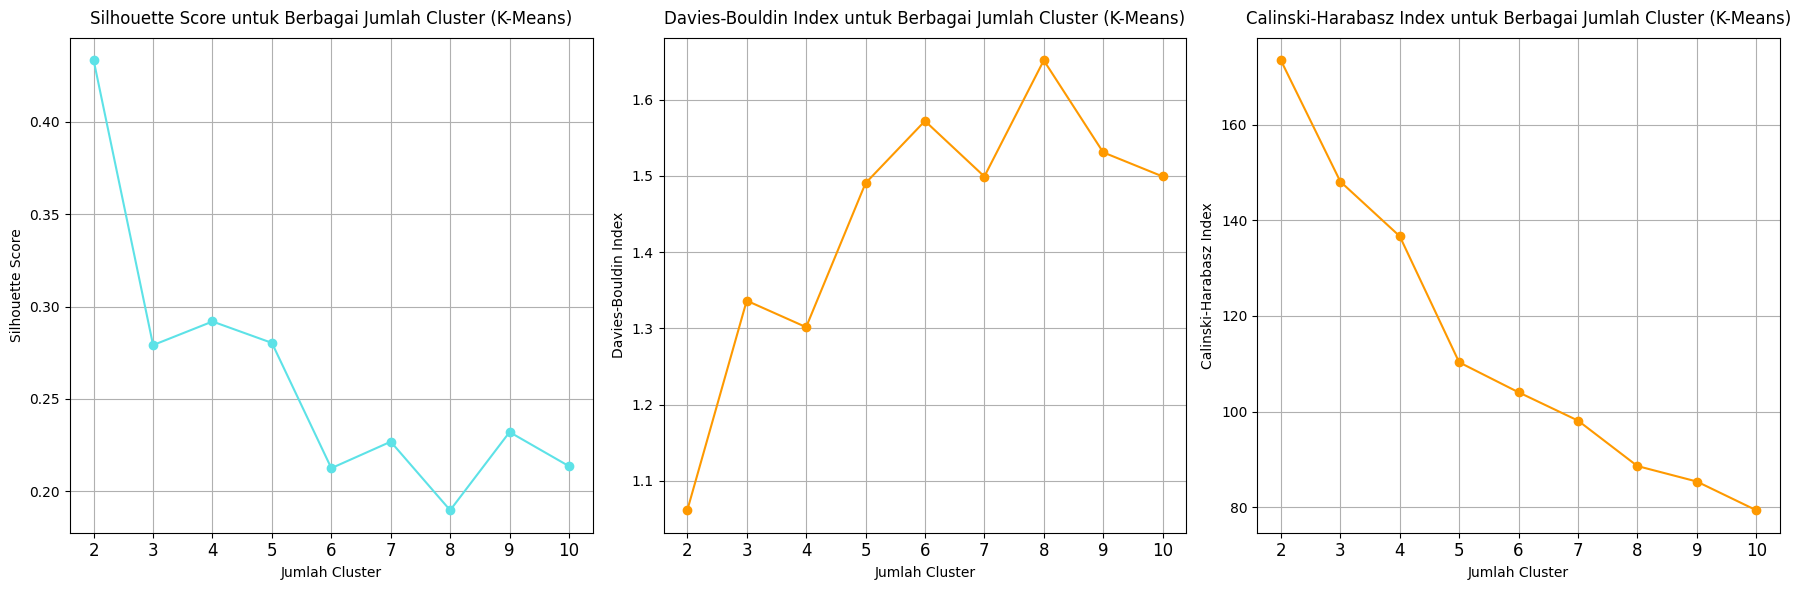

In [28]:
silhouette_scores_km = []
dbi_scores_km = []
chi_scores_km = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_km = kmeans.fit_predict(x_train)

    # Menghitung Silhouette Score
    silhouette_avg_km = silhouette_score(x_train, clusters_km)
    silhouette_scores_km.append(silhouette_avg_km)

    # Menghitung Davies-Bouldin Index
    dbi_avg_km = davies_bouldin_score(x_train, clusters_km)
    dbi_scores_km.append(dbi_avg_km)

    # Menghitung Calinski-Harabasz Index
    chi_avg_km = calinski_harabasz_score(x_train, clusters_km)
    chi_scores_km.append(chi_avg_km)

    print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg_km:.4f}, DBI: {dbi_avg_km:.4f}, CHI: {chi_avg_km: .4f}')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Silhouette Scores
ax[0].plot(range(2, 11), silhouette_scores_km, marker='o', color='#5DE2E7', label='Silhouette Score')
ax[0].set_title('Silhouette Score untuk Berbagai Jumlah Cluster (K-Means)', pad=10)
ax[0].set_xlabel('Jumlah Cluster')
ax[0].set_ylabel('Silhouette Score')
ax[0].tick_params(axis='x', labelsize=12)
ax[0].grid(True)

# Plot Davies-Bouldin Index
ax[1].plot(range(2, 11), dbi_scores_km, marker='o', color='#FE9900', label='Davies-Bouldin Index')
ax[1].set_title('Davies-Bouldin Index untuk Berbagai Jumlah Cluster (K-Means)', pad=10)
ax[1].set_xlabel('Jumlah Cluster')
ax[1].set_ylabel('Davies-Bouldin Index')
ax[1].tick_params(axis='x', labelsize=12)
ax[1].grid(True)

# Plot Calinski-Harabasz Index
ax[2].plot(range(2, 11), chi_scores_km, marker='o', color='#FE9900', label='Calinski-Harabasz Index')
ax[2].set_title('Calinski-Harabasz Index untuk Berbagai Jumlah Cluster (K-Means)', pad=10)
ax[2].set_xlabel('Jumlah Cluster')
ax[2].set_ylabel('Calinski-Harabasz Index')
ax[2].tick_params(axis='x', labelsize=12)
ax[2].grid(True)

plt.tight_layout()
plt.show()

Ward

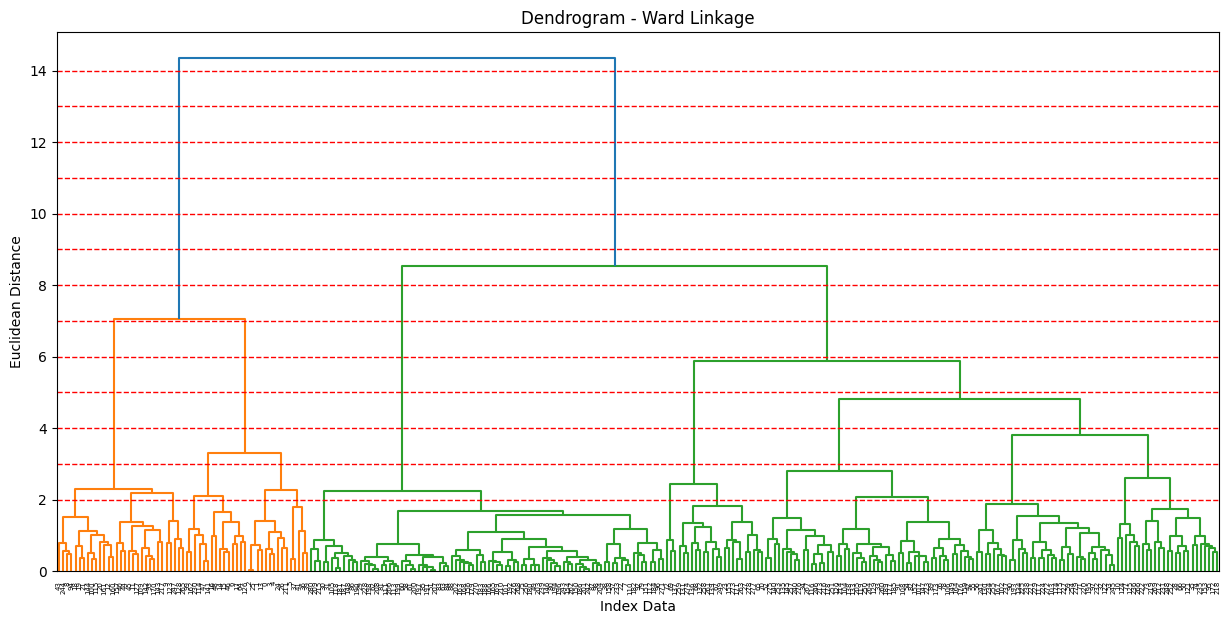

In [29]:
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(x_train, method='ward'))

for i in range(2, 15):
  plt.axhline(y=i, color='r', linestyle='--', linewidth=1)

plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Index Data')
plt.ylabel('Euclidean Distance')
plt.show()

In [30]:
# Menghitung Silhouette Score
sil_score_hie = silhouette_score(x_train, cluster_hie)
print(f"\nSilhouette Score: {sil_score_hie:.4f}")

# Menghitung Davies-Bouldin Index
dbi_score_hie = davies_bouldin_score(x_train, cluster_hie)
print(f"Davies-Bouldin Index: {dbi_score_hie:.4f}")

# Menghitung Calinski-Harabasz Index
chi_score_hie = calinski_harabasz_score(x_train, cluster_hie)
print(f"Calinski-Harabaz Index: {chi_score_hie:.4f}")


Silhouette Score: 0.3946
Davies-Bouldin Index: 1.1581
Calinski-Harabaz Index: 146.6541


Jumlah Cluster: 2, Silhouette Score: 0.3946, DBI: 1.1581, CHI:  146.6541
Jumlah Cluster: 3, Silhouette Score: 0.2116, DBI: 1.3303, CHI:  121.2787
Jumlah Cluster: 4, Silhouette Score: 0.2180, DBI: 1.3109, CHI:  112.3779
Jumlah Cluster: 5, Silhouette Score: 0.2141, DBI: 1.4007, CHI:  106.5361
Jumlah Cluster: 6, Silhouette Score: 0.2229, DBI: 1.4858, CHI:  100.1967
Jumlah Cluster: 7, Silhouette Score: 0.2299, DBI: 1.5417, CHI:  92.6551
Jumlah Cluster: 8, Silhouette Score: 0.2224, DBI: 1.6138, CHI:  86.0617
Jumlah Cluster: 9, Silhouette Score: 0.2149, DBI: 1.6045, CHI:  79.7759
Jumlah Cluster: 10, Silhouette Score: 0.2158, DBI: 1.5579, CHI:  74.6209


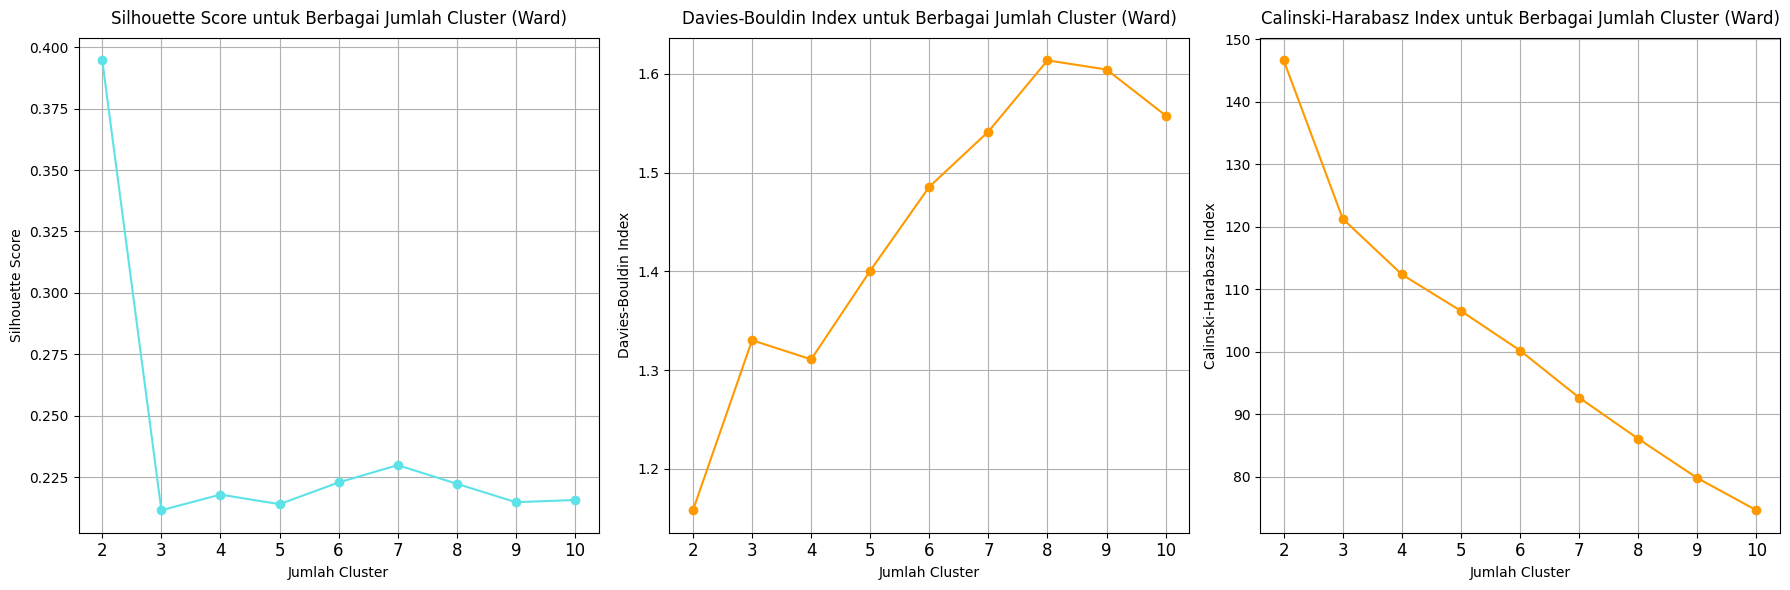

In [31]:
silhouette_scores_hie = []
dbi_scores_hie = []
chi_scores_hie = []

for n_clusters in range(2, 11):
    hie = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters_hie = hie.fit_predict(x_train)

    # Menghitung Silhouette Score
    silhouette_avg_hie = silhouette_score(x_train, clusters_hie)
    silhouette_scores_hie.append(silhouette_avg_hie)

    # Menghitung Davies-Bouldin Index
    dbi_avg_hie = davies_bouldin_score(x_train, clusters_hie)
    dbi_scores_hie.append(dbi_avg_hie)

    # Menghitung Calinski-Harabasz Index
    chi_avg_hie = calinski_harabasz_score(x_train, clusters_hie)
    chi_scores_hie.append(chi_avg_hie)

    print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg_hie:.4f}, DBI: {dbi_avg_hie:.4f}, CHI: {chi_avg_hie: .4f}')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Silhouette Scores
ax[0].plot(range(2, 11), silhouette_scores_hie, marker='o', color='#5DE2E7', label='Silhouette Score')
ax[0].set_title('Silhouette Score untuk Berbagai Jumlah Cluster (Ward)', pad=10)
ax[0].set_xlabel('Jumlah Cluster')
ax[0].set_ylabel('Silhouette Score')
ax[0].tick_params(axis='x', labelsize=12)
ax[0].grid(True)

# Plot Davies-Bouldin Index
ax[1].plot(range(2, 11), dbi_scores_hie, marker='o', color='#FE9900', label='Davies-Bouldin Index')
ax[1].set_title('Davies-Bouldin Index untuk Berbagai Jumlah Cluster (Ward)', pad=10)
ax[1].set_xlabel('Jumlah Cluster')
ax[1].set_ylabel('Davies-Bouldin Index')
ax[1].tick_params(axis='x', labelsize=12)
ax[1].grid(True)

# Plot Calinski-Harabasz Index
ax[2].plot(range(2, 11), chi_scores_hie, marker='o', color='#FE9900', label='Calinski-Harabasz Index')
ax[2].set_title('Calinski-Harabasz Index untuk Berbagai Jumlah Cluster (Ward)', pad=10)
ax[2].set_xlabel('Jumlah Cluster')
ax[2].set_ylabel('Calinski-Harabasz Index')
ax[2].tick_params(axis='x', labelsize=12)
ax[2].grid(True)

plt.tight_layout()
plt.show()

# Analisis

K-Means

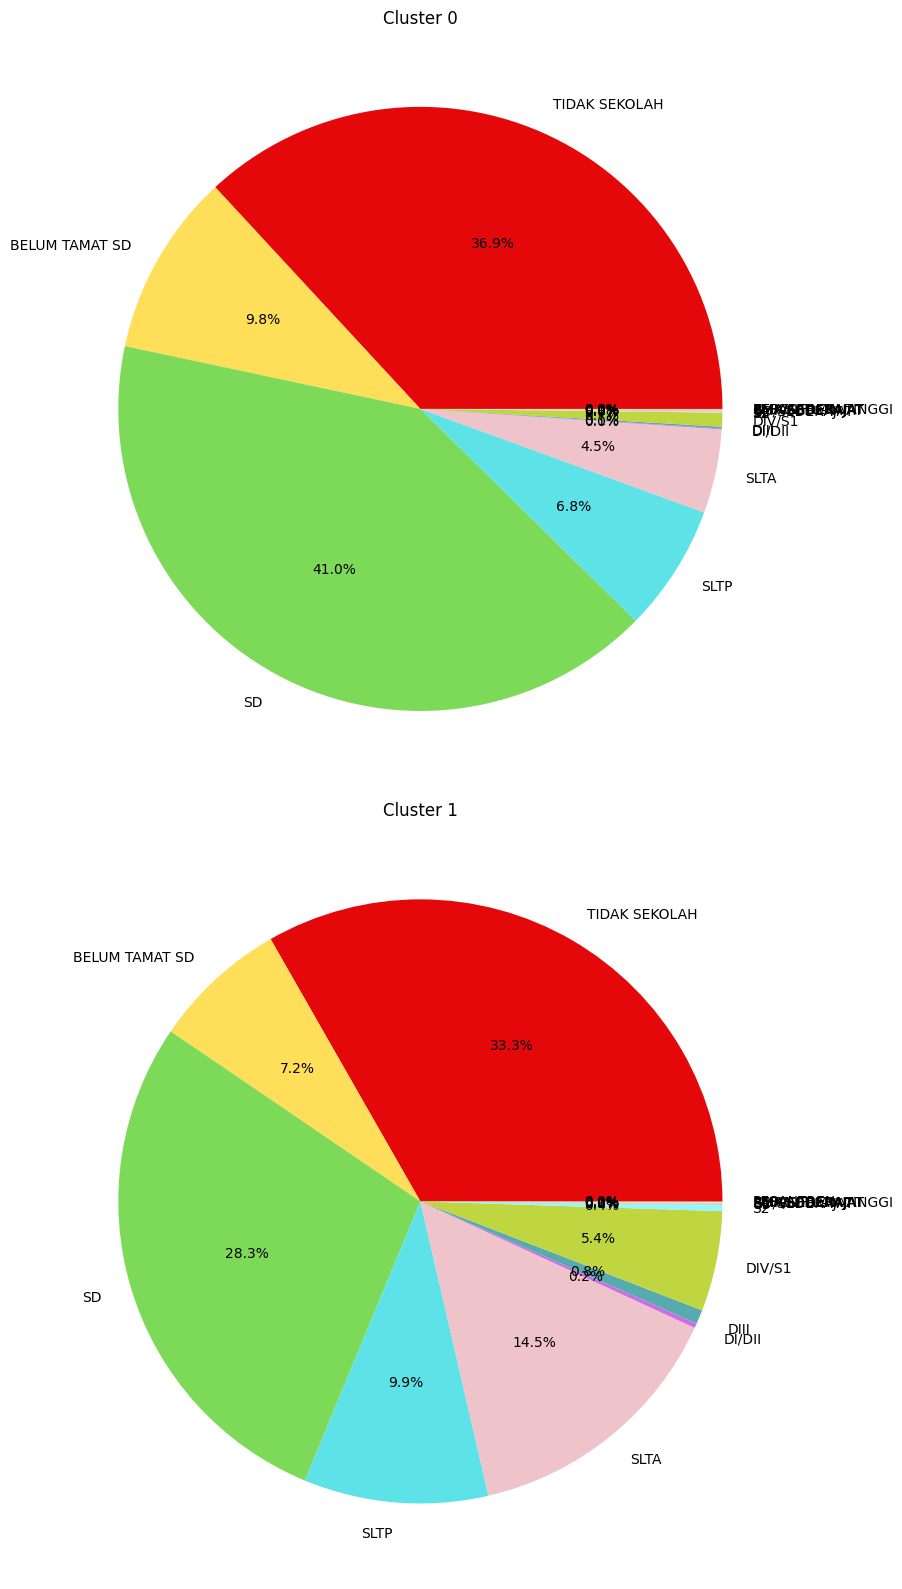

In [32]:
fitur = ['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
         'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT', 'SMP/SEDERAJAT',
         'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN']
colors = ['#E4080A', '#FFDE59', '#7DDA58', '#5DE2E7', '#EFC3CA', '#CC6CE7',
          '#57ABAF', '#BFD641', '#98F5F9', '#FE9900', '#EFC3CA', '#FFECA1',
          '#709E5E', '#8D6F64', '#CECECE']

kolom_sum_km = dfdesa_km.groupby(by='Cluster')[fitur].sum()
kolom_percent_km = kolom_sum_km.div(kolom_sum_km.sum(axis=1), axis=0) * 100
percentase_km = kolom_percent_km.round(4)
total_km = kolom_percent_km.sum(axis=1)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax[0].pie(x=percentase_km.loc[0], labels=fitur, autopct='%1.1f%%', colors=colors)
ax[0].set_title('Cluster 0')

ax[1].pie(x=percentase_km.loc[1], labels=fitur, autopct='%1.1f%%', colors=colors)
ax[1].set_title('Cluster 1')

plt.tight_layout()
plt.show()

In [33]:
percentase_total_km = percentase_km.copy().astype(str) + '%'
percentase_total_km['Total'] = total_km.round(1).astype(str) + '%'
percentase_total_km.head()

TIDAK SEKOLAH BELUM TAMAT SD        SD     SLTP      SLTA   DI/DII  \
Cluster                                                                      
0            36.8827%         9.782%  40.9672%  6.7999%   4.4888%  0.0438%   
1            33.2552%        7.2301%    28.27%   9.864%  14.5044%  0.2439%   

            DIII   DIV/S1       S2       S3 SD/SEDERAJAT SMP/SEDERAJAT  \
Cluster                                                                  
0        0.0943%   0.745%  0.0313%  0.0096%      0.0898%       0.0435%   
1        0.7615%  5.3572%  0.3618%  0.0224%      0.0641%       0.0337%   

        SMA/SEDERAJAT SMK/SEDERAJAT PERGURUAN TINGGI PESANTREN   Total  
Cluster                                                                 
0             0.0127%       0.0059%          0.0003%   0.0033%  100.0%  
1             0.0166%       0.0083%           0.003%   0.0039%  100.0%

In [34]:
# Cluster per Kecamatan
byKecamatan_km = dfdesa_km[dfdesa_km['Kecamatan'] == 'BANGKALAN']
byKecamatandf_km = byKecamatan_km[['Kecamatan', 'Desa', 'Cluster']].sort_values(by='Cluster')
byKecamatandf_km

Kecamatan          Desa  Cluster
7   BANGKALAN   SEMBILANGAN        0
12  BANGKALAN        GEBANG        0
9   BANGKALAN        KRAMAT        0
8   BANGKALAN  UJUNG PIRING        0
3   BANGKALAN      DEMANGAN        1
0   BANGKALAN        MLAJAH        1
2   BANGKALAN    PANGERANAN        1
1   BANGKALAN     KEMAYORAN        1
6   BANGKALAN      BANCARAN        1
5   BANGKALAN       PEJAGAN        1
4   BANGKALAN        KRATON        1
10  BANGKALAN    MERTAJASAH        1
11  BANGKALAN       SABIYAN        1

In [35]:
# Jumlah tiap cluster per kecamatan
jml_cluster_km = byKecamatandf_km.groupby(by='Cluster').Desa.count()

percentase_per_cluster_km = (jml_cluster_km/jml_cluster_km.sum())*100

hasilkm_df = pd.DataFrame({
  'Jumlah Desa': jml_cluster_km,
  'Persentase (%)': percentase_per_cluster_km.round(2).astype(str) + '%'
})

hasilkm_df

Jumlah Desa Persentase (%)
Cluster                            
0                  4         30.77%
1                  9         69.23%

Ward

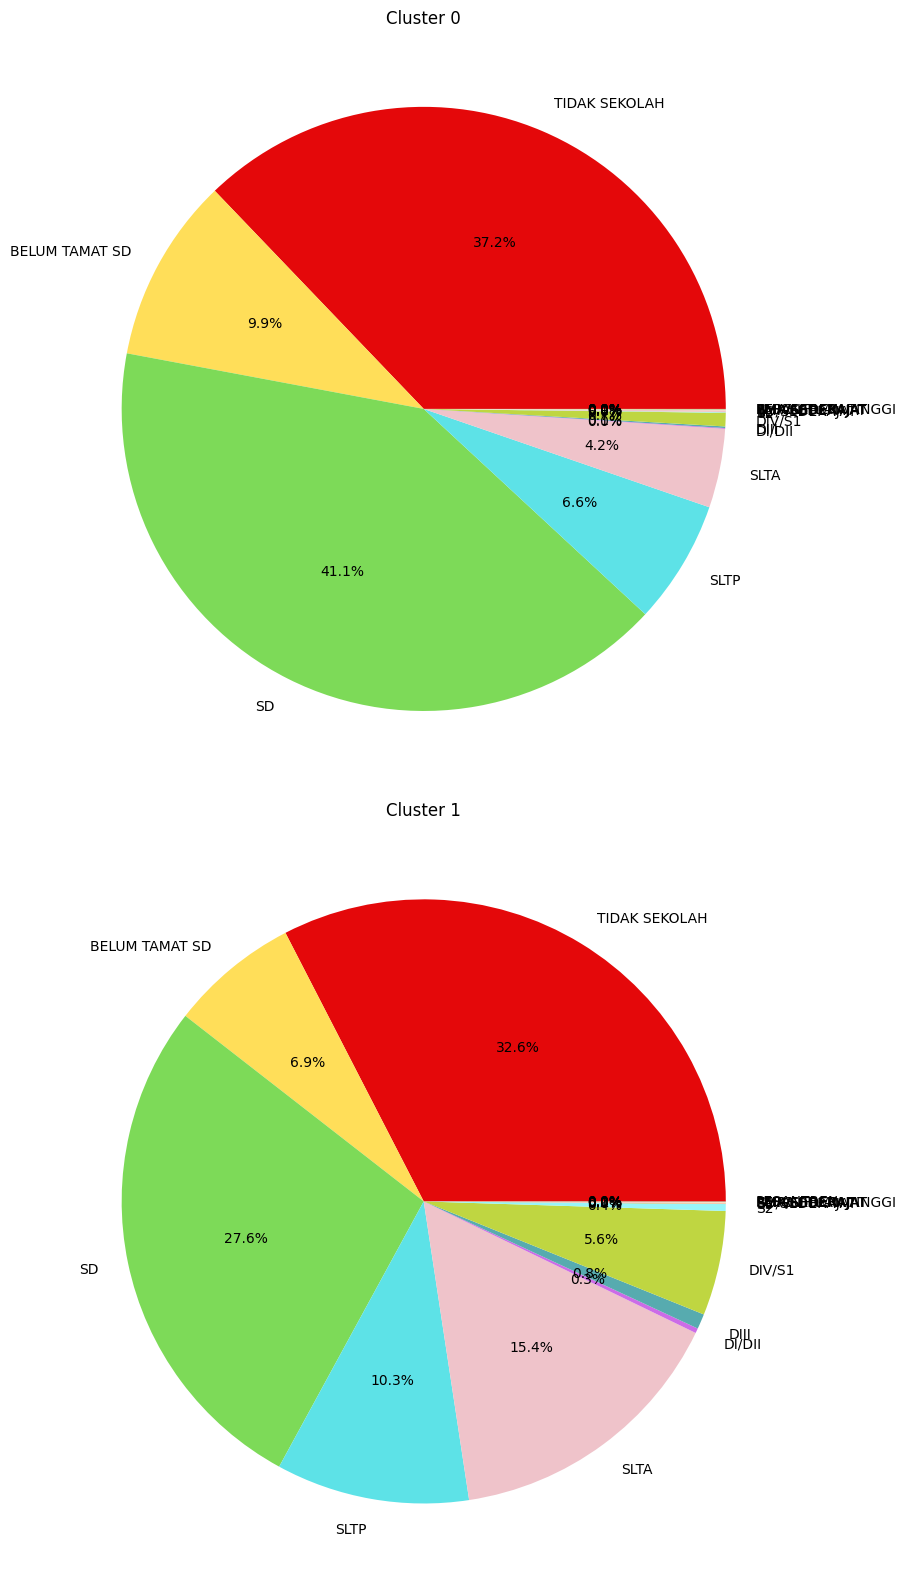

In [36]:
fitur = ['TIDAK SEKOLAH', 'BELUM TAMAT SD', 'SD', 'SLTP', 'SLTA',
         'DI/DII', 'DIII', 'DIV/S1', 'S2', 'S3', 'SD/SEDERAJAT', 'SMP/SEDERAJAT',
         'SMA/SEDERAJAT', 'SMK/SEDERAJAT', 'PERGURUAN TINGGI', 'PESANTREN']
colors = ['#E4080A', '#FFDE59', '#7DDA58', '#5DE2E7', '#EFC3CA', '#CC6CE7',
          '#57ABAF', '#BFD641', '#98F5F9', '#FE9900', '#EFC3CA', '#FFECA1',
          '#709E5E', '#8D6F64', '#CECECE']

kolom_sum_hie = dfdesa_hie.groupby(by='Cluster')[fitur].sum()
kolom_percent_hie = kolom_sum_hie.div(kolom_sum_hie.sum(axis=1), axis=0) * 100
percentase_hie = kolom_percent_hie.round(4)
total_hie = kolom_percent_hie.sum(axis=1)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax[0].pie(x=percentase_hie.loc[0], labels=fitur, autopct='%1.1f%%', colors=colors)
ax[0].set_title('Cluster 0')

ax[1].pie(x=percentase_hie.loc[1], labels=fitur, autopct='%1.1f%%', colors=colors)
ax[1].set_title('Cluster 1')

plt.tight_layout()
plt.show()

In [37]:
percentase_total_hie = percentase_hie.copy().astype(str) + '%'
percentase_total_hie['Total'] = total_hie.round(1).astype(str) + '%'
percentase_total_hie.head()

TIDAK SEKOLAH BELUM TAMAT SD        SD     SLTP      SLTA   DI/DII  \
Cluster                                                                      
0            37.1584%        9.8947%  41.0516%  6.6178%   4.2265%   0.041%   
1            32.5683%        6.9053%  27.5835%  10.345%  15.4278%  0.2576%   

            DIII   DIV/S1       S2       S3 SD/SEDERAJAT SMP/SEDERAJAT  \
Cluster                                                                  
0        0.0843%  0.7187%  0.0352%  0.0094%      0.0904%       0.0467%   
1        0.8083%  5.5981%  0.3678%  0.0233%      0.0618%        0.027%   

        SMA/SEDERAJAT SMK/SEDERAJAT PERGURUAN TINGGI PESANTREN   Total  
Cluster                                                                 
0             0.0147%       0.0068%          0.0004%   0.0032%  100.0%  
1             0.0127%       0.0066%          0.0029%    0.004%  100.0%

In [38]:
# Cluster per Kecamatan
byKecamatan_hie = dfdesa_hie[dfdesa_hie['Kecamatan'] == 'BANGKALAN']
byKecamatandf_hie = byKecamatan_hie[['Kecamatan', 'Desa', 'Cluster']].sort_values(by='Cluster')
byKecamatandf_hie

Kecamatan          Desa  Cluster
7   BANGKALAN   SEMBILANGAN        0
10  BANGKALAN    MERTAJASAH        0
2   BANGKALAN    PANGERANAN        1
0   BANGKALAN        MLAJAH        1
3   BANGKALAN      DEMANGAN        1
4   BANGKALAN        KRATON        1
5   BANGKALAN       PEJAGAN        1
1   BANGKALAN     KEMAYORAN        1
6   BANGKALAN      BANCARAN        1
8   BANGKALAN  UJUNG PIRING        1
9   BANGKALAN        KRAMAT        1
11  BANGKALAN       SABIYAN        1
12  BANGKALAN        GEBANG        1

In [39]:
# Jumlah tiap cluster per kecamatan
jml_cluster_hie = byKecamatandf_hie.groupby(by='Cluster').Desa.count()

percentase_per_cluster_hie = (jml_cluster_hie/jml_cluster_hie.sum())*100

hasilhie_df = pd.DataFrame({
  'Jumlah Desa': jml_cluster_hie,
  'Persentase (%)': percentase_per_cluster_hie.round(2).astype(str) + '%'
})

hasilhie_df

Jumlah Desa Persentase (%)
Cluster                            
0                  2         15.38%
1                 11         84.62%

In [40]:
# Install folium
!pip install folium

import geopandas as gpd
import pandas as pd
import folium
from folium import Tooltip
from IPython.display import display

# Warna untuk cluster
colors = {
    0: '#66c2a5',
    1: '#ffd92f'
}

# Baca shapefile GADM level 4 (desa)
gdf_all = gpd.read_file("/content/drive/MyDrive/skripsi/gadm36_IDN_4/gadm36_IDN_4.shp")

# Filter hanya Bangkalan
gdf_bangkalan = gdf_all[gdf_all["NAME_2"] == "Bangkalan"]

# Baca hasil clustering
df_cluster = dfdesa_km

# Uppercase nama kecamatan dan desa
df_cluster['Kecamatan'] = df_cluster['Kecamatan'].str.upper().str.strip()
df_cluster['Desa'] = df_cluster['Desa'].str.upper().str.strip()
gdf_bangkalan['NAME_3'] = gdf_bangkalan['NAME_3'].str.upper().str.strip()
gdf_bangkalan['NAME_4'] = gdf_bangkalan['NAME_4'].str.upper().str.strip()

# Merge shapefile dengan hasil clustering
gdf_joined = gdf_bangkalan.merge(
    df_cluster,
    left_on=['NAME_3', 'NAME_4'],
    right_on=['Kecamatan', 'Desa']
)

# hasil merge
print("Jumlah baris setelah merge:", len(gdf_joined))

# Validasi geometry
gdf_joined = gdf_joined[gdf_joined.geometry.notnull() & ~gdf_joined.geometry.is_empty]
gdf_joined = gdf_joined[gdf_joined.is_valid]

# Set CRS jika belum ada
if gdf_joined.crs is None:
    gdf_joined.set_crs(epsg=4326, inplace=True)
else:
    gdf_joined = gdf_joined.to_crs(epsg=4326)

# Ambil titik tengah peta
center = gdf_joined.geometry.centroid.unary_union.centroid
m = folium.Map(location=[center.y, center.x], zoom_start=10, tiles='cartodbpositron')

# Tambahkan layer per desa
for _, row in gdf_joined.iterrows():
    geo_json = gpd.GeoSeries([row.geometry]).__geo_interface__

    folium.GeoJson(
        data=geo_json,
        style_function=lambda feature, color=colors[row["Cluster"]]: {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.7,
        },
        tooltip=Tooltip(f"Desa: {row['Desa'].title()}<br>Kecamatan: {row['Kecamatan'].title()}<br>Cluster: {row['Cluster']}")
    ).add_to(m)

# Tambahkan legend
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 160px; height: 90px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
<b>Legend:</b><br>
<i style="background: #66c2a5; width: 10px; height: 10px; float: left; margin-right: 5px;"></i> Cluster 0<br>
<i style="background: #ffd92f; width: 10px; height: 10px; float: left; margin-right: 5px;"></i> Cluster 1<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan peta
m.save("/content/peta_cluster_bangkalan.html")
display(m)


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Jumlah baris setelah merge: 281


/tmp/ipython-input-40-1446757076.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_joined.geometry.centroid.unary_union.centroid
/tmp/ipython-input-40-1446757076.py:52: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdf_joined.geometry.centroid.unary_union.centroid
